# [NY Citi Bike](https://citibikenyc.com/) Data Analysis: Regression Analysis
Script by Ryan Lee

## Table of Contents

### 1. [Import libraries](#Import_libraries)

### 2. [Import data](#Import_data)

### 3. [Data wrangling](#Data_wrangling)

### 4. [Data cleaning](#Data_cleaning)

- [Extreme values check](#extreme)

### 5. [Exploring relationships between variables](#Exploring_relationships)

### 6. [Regression analysis](#Regression_analysis)

- [On age and trip duration](#age_trip)
- [On start hour and trip duration](#start_trip)

### 7. [Regression analysis without outliers](#Regression_analysis_no_outliers)

- [On age and trip duration](#age_trip_no_outliers)
- [On start hour and trip duration](#start_trip_no_outliers)

<a id='Import_libraries'></a>
# 1. Import libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command prompts matplotlib visuals to appear in the notebook without the need to "call" them specifically.

%matplotlib inline

<a id='Import_data'></a>
# 2. Import data

In [3]:
# Create a string of the path for the main project folder

path = r'C:\Users\Ryan\Documents\08-31-2023 Citi Bike Analysis'

In [4]:
# Import the “201903-citibike-tripdata-cleaned.pkl” data set using the os library

df_citibike = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.pkl'))

In [5]:
# Check the output

df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude,borough
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591,Manhattan
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858,Manhattan
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120,Manhattan
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741,Manhattan
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821,Manhattan


In [6]:
# Check the dimensions

df_citibike.shape

(1255492, 15)

<a id='Data_wrangling'></a>
# 3. Data wrangling

In [7]:
# Create a subset

df = df_citibike[['age', 'trip_duration', 'start_hour']]

In [8]:
# Check the output

df.head()

,age,trip_duration,start_hour
0,30,24.379999,0
1,39,4.750000,0
2,32,11.430000,0
3,32,7.370000,0
4,28,48.549999,0


In [9]:
# Check the dimensions

df.shape

(1255492, 3)

<a id='Data_cleaning'></a>
# 4. Data cleaning

<a id='extreme'></a>
## Extreme values check

<Axes: xlabel='trip_duration', ylabel='Count'>

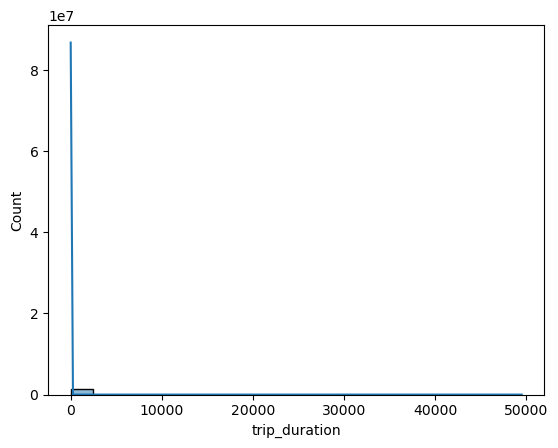

In [10]:
# Show extreme values for 'trip_duration'

sns.histplot(df['trip_duration'], bins=20, kde = True)

In [11]:
# Check trip duration statistics

df['trip_duration'].describe()

count    1.255492e+06
mean     1.359681e+01
std      1.249650e+02
min      1.020000e+00
25%      5.250000e+00
50%      8.730000e+00
75%      1.503000e+01
max      4.949635e+04
Name: trip_duration, dtype: float64

In [12]:
# Obtain upper outlier bound

15.03 + 1.5*(15.03-5.25)

29.699999999999996

In [13]:
# Check how many values are above 29.7

df.loc[df['trip_duration'] > 29.7].shape

(77561, 3)

In [14]:
# Check how much data would be removed if trip duration values > 29.7 were removed

77561/1255492

0.061777374925527206

There are a lot of extreme values for trip duration. Removing them would result in removing more than 5% of the data. Therefore, I will keep the extreme values in the data.

<a id='Exploring_relationships'></a>
# 5. Exploring relationships between variables

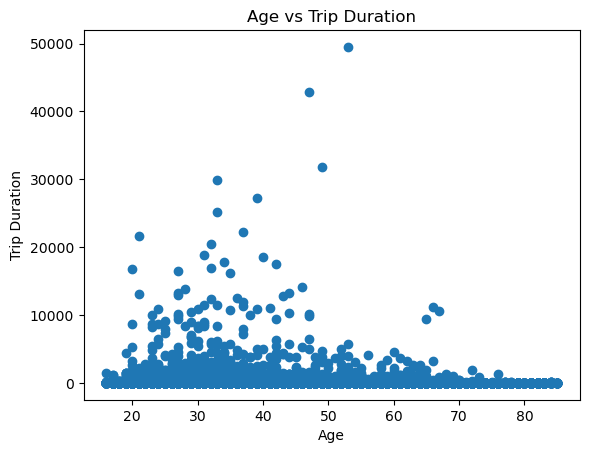

In [15]:
# Explore relationships between age and trip duration

df.plot(x='age', y='trip_duration', style='o') 
plt.title('Age vs Trip Duration')  
plt.xlabel('Age')  
plt.ylabel('Trip Duration')  
plt.legend().remove()
plt.show()

**Hypothesis:** The older you are, the shorter the trip duration.

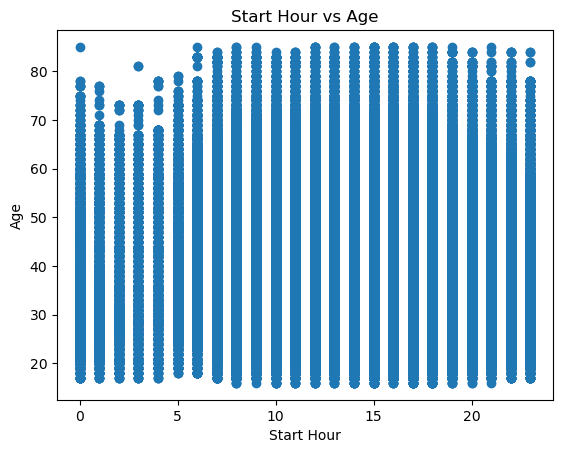

In [16]:
# Explore relationship between start hour and age

df.plot(x='start_hour', y='age', style='o') 
plt.title('Start Hour vs Age')  
plt.xlabel('Start Hour')
plt.ylabel('Age')    
plt.legend().remove()
plt.show()

**There does not appear to be a relationship between start hour and age. No hypothesis can be formed.**

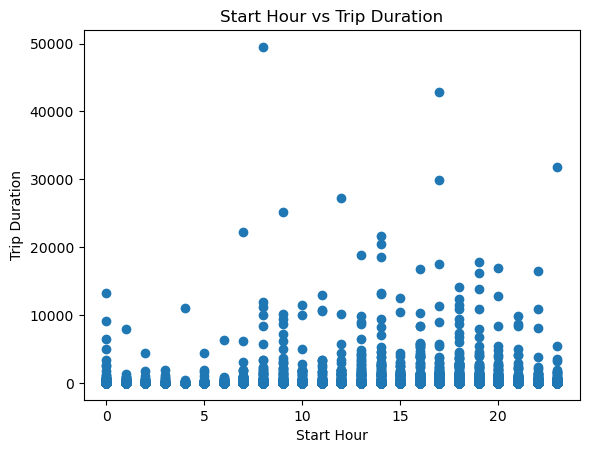

In [17]:
# Explore relationship between start hour and trip duration

df.plot(x='start_hour', y='trip_duration', style='o') 
plt.title('Start Hour vs Trip Duration')  
plt.xlabel('Start Hour')  
plt.ylabel('Trip Duration')  
plt.legend().remove()
plt.show()

**Hypothesis:** The later the start hour, the longer the trip duration.

<a id='Regression_analysis'></a>
# 6. Regression analysis

<a id='age_trip'></a>
## Regression analysis on age and trip duration

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['age'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [19]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

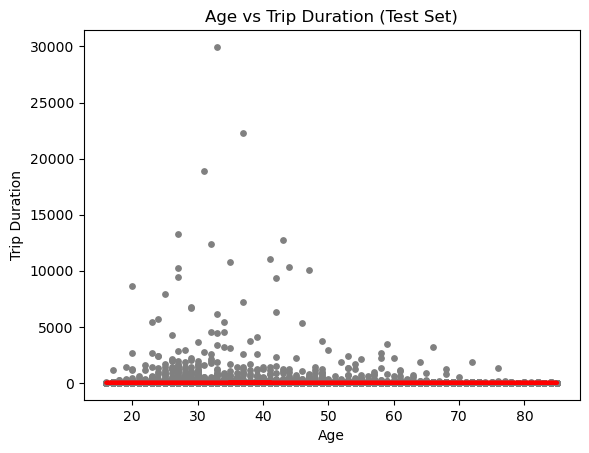

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Age vs Trip Duration (Test Set)')
plt.xlabel('Age')
plt.ylabel('Trip Duration')
plt.show()

The line appears to fit the data very poorly. The line fits mostly with trip durations that are 60 minutes or fewer.

In [24]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [25]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06086029]]
Mean squared error:  10675.543691566238
R2 score:  4.278028055881844e-05


In [26]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(20)

,Actual,Predicted
0,6.950000,13.927639
1,13.050000,11.858389
2,27.420000,13.866779
3,11.870000,14.110220
4,19.080000,12.345272
5,5.820000,14.171080
6,28.430000,13.136455
7,3.350000,14.171080
8,5.770000,13.136455
9,12.220000,13.623338


The model performed very poorly. We can see there are very big differences between the actual and predicted values. Furthermore, the R2 score is very close to 0, indicating a very poor fit. This was, however, to be expected since the correlation found in exercise 6.2 was close to 0, indicating there is no relationship between age and trip duration.

<a id='start_trip'></a>
## Regression analysis on start hour and trip duration

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['start_hour'].values.reshape(-1,1)

In [28]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

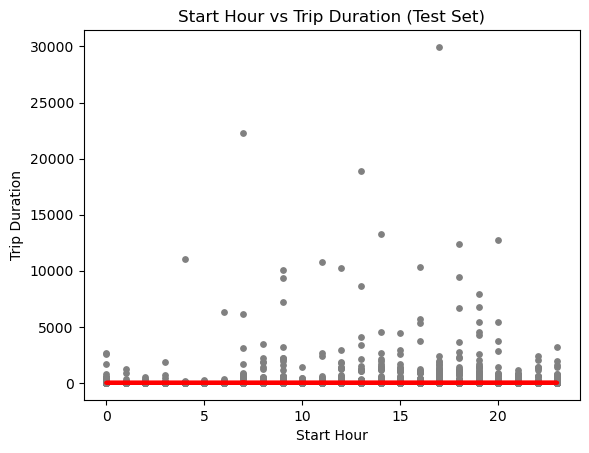

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Start Hour vs Trip Duration (Test Set)')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

The line appears to fit the data very poorly. The line fits mostly with trip durations that are 60 minutes or fewer.

In [32]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [33]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13201353]]
Mean squared error:  10675.980489977126
R2 score:  1.866230918801115e-06


In [34]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(20)

,Actual,Predicted
0,6.950000,12.773004
1,13.050000,13.565085
2,27.420000,13.433072
3,11.870000,14.093139
4,19.080000,14.753207
5,5.820000,13.961126
6,28.430000,14.093139
7,3.350000,14.357166
8,5.770000,13.829112
9,12.220000,11.980923


The model performed very poorly. We can see there are very big differences between the actual and predicted values. Furthermore, the R2 score is very close to 0, indicating a very poor fit. This was, however, to be expected since the correlation found in exercise 6.2 was close to 0, indicating there is no relationship between start hour and trip duration.

<a id='Regression_analysis_no_outliers'></a>
# 7. Regression analysis without outliers

<a id='age_trip_no_outliers'></a>
## Regression analysis on age and trip duration

In [35]:
# Remove extreme values

df = df.loc[df['trip_duration'] <= 90]

90 was picked because it is beyond belief a Citi Bike user would need to borrow a bike for more than 90 minutes!

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['age'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [37]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

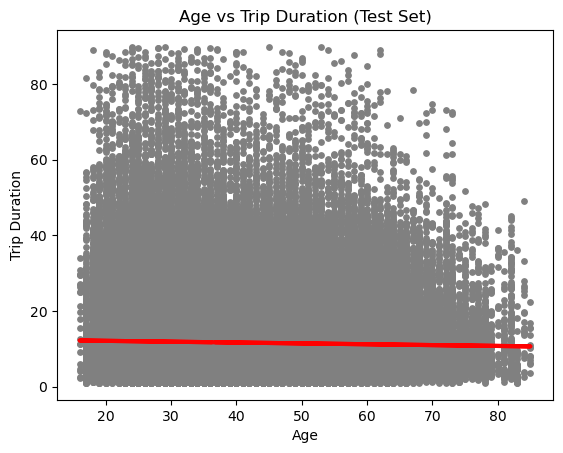

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Age vs Trip Duration (Test Set)')
plt.xlabel('Age')
plt.ylabel('Trip Duration')
plt.show()

The line appears to fit the data poorly. There are so many values above and below the regression line.

In [41]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [42]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02247475]]
Mean squared error:  92.15825260861203
R2 score:  0.0007036657834929017


In [43]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(20)

,Actual,Predicted
0,10.230000,11.752521
1,7.170000,11.258077
2,7.800000,11.819946
3,3.430000,11.460350
4,4.080000,11.909845
5,10.420000,11.617673
6,10.670000,11.864895
7,7.280000,11.842420
8,22.450001,11.819946
9,5.020000,11.887370


The model performed very poorly even with extreme values removed. We can see there are very big differences between the actual and predicted values. Furthermore, the R2 score is very close to 0, indicating a very poor fit.

<a id='start_trip_no_outliers'></a>
## Regression analysis on start hour and trip duration

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['start_hour'].values.reshape(-1,1)

In [45]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

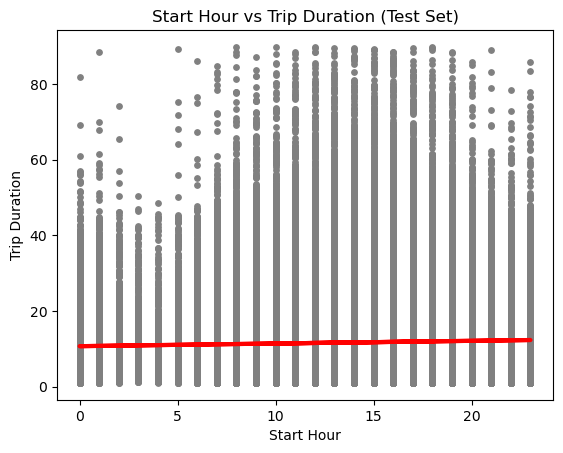

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Start Hour vs Trip Duration (Test Set)')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

The line appears to fit the data poorly. There are so many values above and below the regression line.

In [49]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [50]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0707666]]
Mean squared error:  92.08753932045559
R2 score:  0.001470428690068748


In [51]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(20)

,Actual,Predicted
0,10.230000,11.997433
1,7.170000,11.502066
2,7.800000,11.643600
3,3.430000,11.997433
4,4.080000,11.148233
5,10.420000,11.785133
6,10.670000,11.997433
7,7.280000,11.997433
8,22.450001,12.138966
9,5.020000,12.280499


The model performed very poorly even with extreme values removed. We can see there are very big differences between the actual and predicted values. Furthermore, the R2 score is very close to 0, indicating a very poor fit.